In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import seaborn as sns

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
X = df.drop(columns='quality')
y = df['quality']
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [9]:
y.head(2)

0    5
1    5
Name: quality, dtype: int64

In [10]:
print(y[:5])
bins = [0, 5.5, 8]
labels = ['average', 'good']
y = pd.cut(y, bins=bins, labels=labels)
print(y[:5])

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64
0    average
1    average
2    average
3       good
4    average
Name: quality, dtype: category
Categories (2, object): ['average' < 'good']


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y[:5])

[0 0 0 1 0]


In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
X.shape

(1599, 11)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True,  random_state=69)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
prediction = rfc.predict(x_test)
print(prediction[:5])
print(y_test[:5])

[1 0 1 1 0]
[1 0 1 0 0]


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

0.805
[[147  40]
 [ 38 175]]


In [22]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=2)

print(y_train[:5])

[1 1 0 1 0]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [24]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Metal device set to: Apple M1


2023-02-24 04:38:11.978094: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-24 04:38:11.978830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 17,474
Trainable params: 17,474
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, batch_size=1000, epochs=100, verbose=2)

Epoch 1/100


2023-02-24 04:40:25.987617: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-24 04:40:26.165361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 - 0s - loss: 0.6920 - accuracy: 0.5229 - 376ms/epoch - 188ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6471 - accuracy: 0.6722 - 24ms/epoch - 12ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6192 - accuracy: 0.7239 - 21ms/epoch - 11ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5999 - accuracy: 0.7181 - 20ms/epoch - 10ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5755 - accuracy: 0.7389 - 19ms/epoch - 10ms/step
Epoch 6/100
2/2 - 0s - loss: 0.5527 - accuracy: 0.7415 - 20ms/epoch - 10ms/step
Epoch 7/100
2/2 - 0s - loss: 0.5442 - accuracy: 0.7440 - 21ms/epoch - 10ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5392 - accuracy: 0.7448 - 20ms/epoch - 10ms/step
Epoch 9/100
2/2 - 0s - loss: 0.5342 - accuracy: 0.7406 - 21ms/epoch - 10ms/step
Epoch 10/100
2/2 - 0s - loss: 0.5365 - accuracy: 0.7506 - 22ms/epoch - 11ms/step
Epoch 11/100
2/2 - 0s - loss: 0.5240 - accuracy: 0.7531 - 21ms/epoch - 10ms/step
Epoch 12/100
2/2 - 0s - loss: 0.5231 - accuracy: 0.7506 - 20ms/epoch - 10ms/step
Epoch 13/100
2/2 - 0s - loss: 0.5222 - accuracy

In [27]:
prediction = model.predict(x_test)
print(prediction[:5])

13/13 [==============================] - 0s 3ms/step
[[5.3238979e-04 9.9946767e-01]
 [9.6463037e-01 3.5369657e-02]
 [8.2964048e-02 9.1703594e-01]
 [3.9116837e-02 9.6088314e-01]
 [7.2834700e-01 2.7165303e-01]]


2023-02-24 04:41:28.218960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [28]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[1 0 1 1 0]


In [29]:
print(y_test[:5])

[1 0 1 0 0]


In [30]:
print(accuracy_score(y_test, prediction))

0.765


In [31]:
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

[[140  47]
 [ 47 166]]


Text(50.722222222222214, 0.5, 'actual')

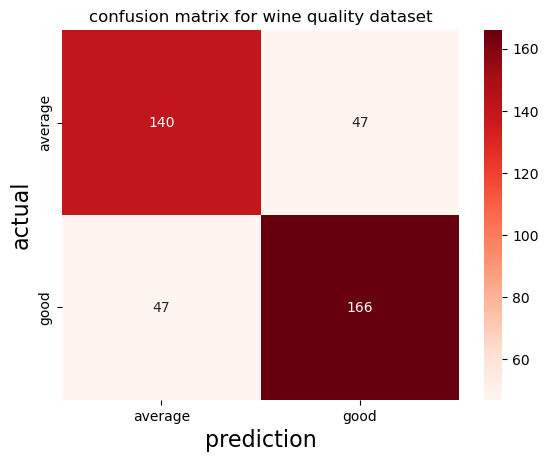

In [35]:
label = ['average','good']
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label, yticklabels=label)
ax.set_title('confusion matrix for wine quality dataset')
ax.set_xlabel('prediction', fontsize=16)
ax.set_ylabel('actual', fontsize=16)